In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [65]:
df = pd.read_csv('IMDb Movies India.csv', encoding = 'ISO-8859-1')

In [67]:
print(df.shape)
print(df.info())
df.head()

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [69]:
#removing missing values

In [71]:
df.dropna(inplace=True)

In [73]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

Since year is object type data we convert it into float


In [76]:
df['Year'] = df['Year'].astype(str)  
df['Year'] = df['Year'].str.replace('(', '', regex=False)
df['Year'] = df['Year'].str.replace(')', '', regex=False).astype(int) 

EDA

In [79]:
df['Name'].nunique()

5385

In [81]:
df['Year'].nunique()

91

In [83]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

            Year    Rating
Year    1.000000 -0.204642
Rating -0.204642  1.000000


C:\Users\Arshia\AppData\Local\Temp\ipykernel_28252\688381739.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



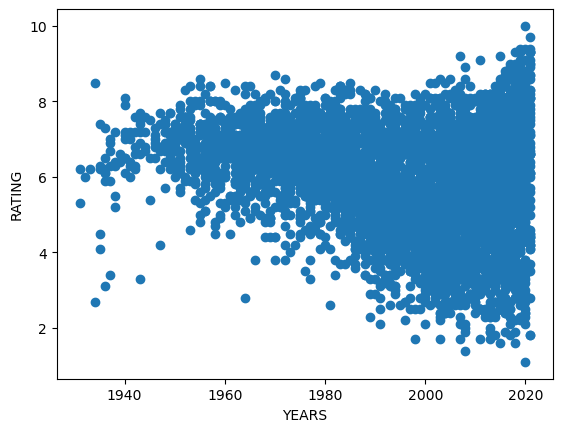

In [85]:
plt.scatter(df['Year'],df['Rating']);
plt.xlabel('YEARS')
plt.ylabel('RATING');

Text(0.5, 1.0, 'FREQUANCY OF DATA POINTS')

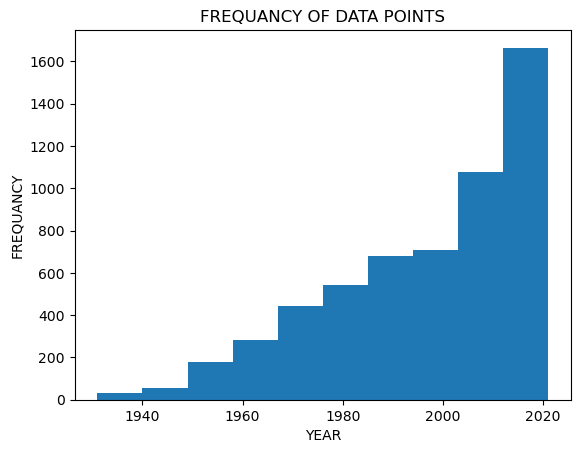

In [87]:
df['Year'].plot(kind='hist');
plt.xlabel('YEAR')
plt.ylabel('FREQUANCY')
plt.title('FREQUANCY OF DATA POINTS')

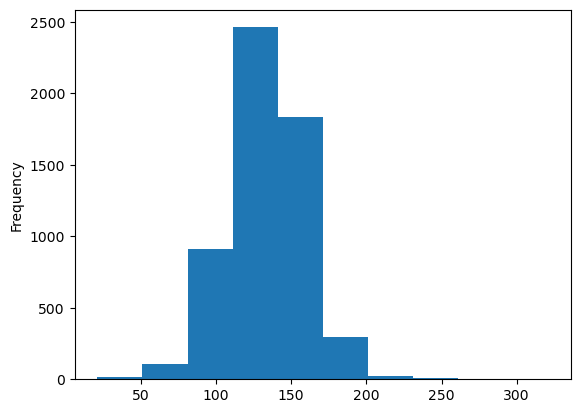

In [88]:
df['Duration(min)'] = df['Duration'].str.split(' ',expand=True)[0].astype(float)

df['Duration(min)'].plot(kind='hist');

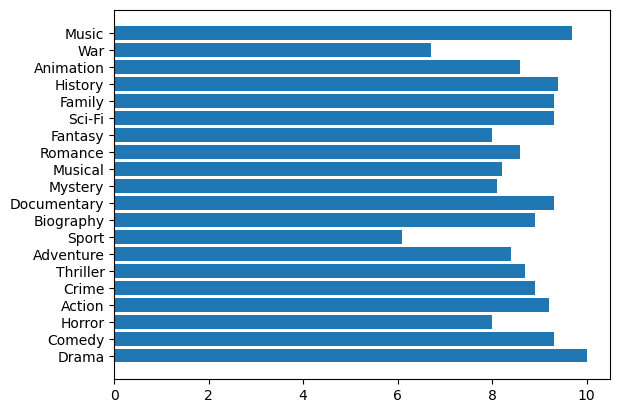

In [90]:
df['Genre']=df['Genre'].str.split(',',expand=True)[0]

plt.barh(df['Genre'],df['Rating']);

<Axes: ylabel='Frequency'>

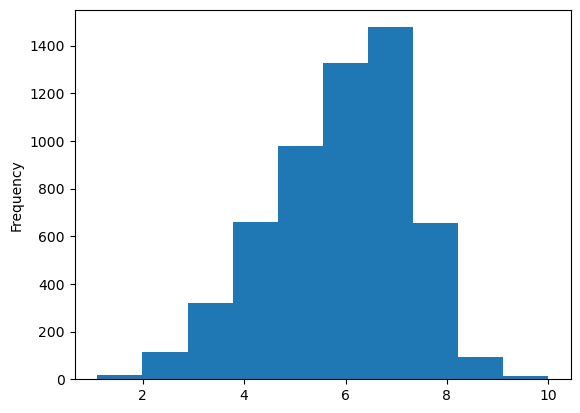

In [92]:
df['Rating'].plot(kind='hist')

In [93]:
df['Votes'].describe()

count     5659
unique    2027
top          7
freq        90
Name: Votes, dtype: object

Text(0.5, 1.0, 'how votes affects the rating')

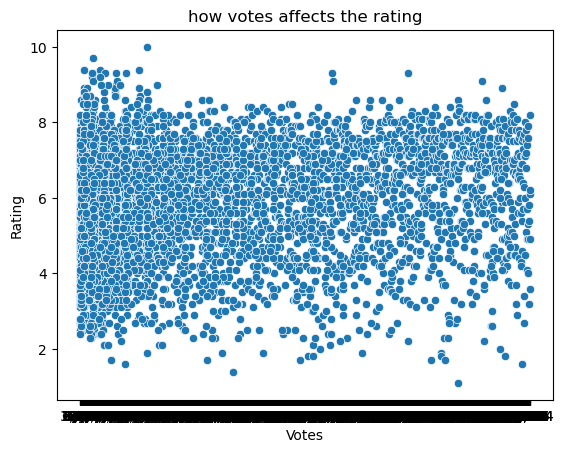

In [94]:
import seaborn as sns
sns.scatterplot(x="Votes",y="Rating",data=df)
plt.title("how votes affects the rating")

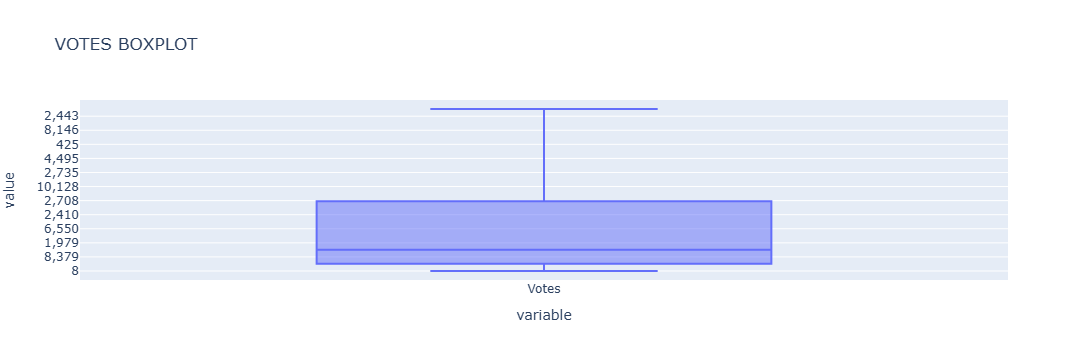

In [95]:
fig = px.box(df['Votes'],title='VOTES BOXPLOT')
fig.show()

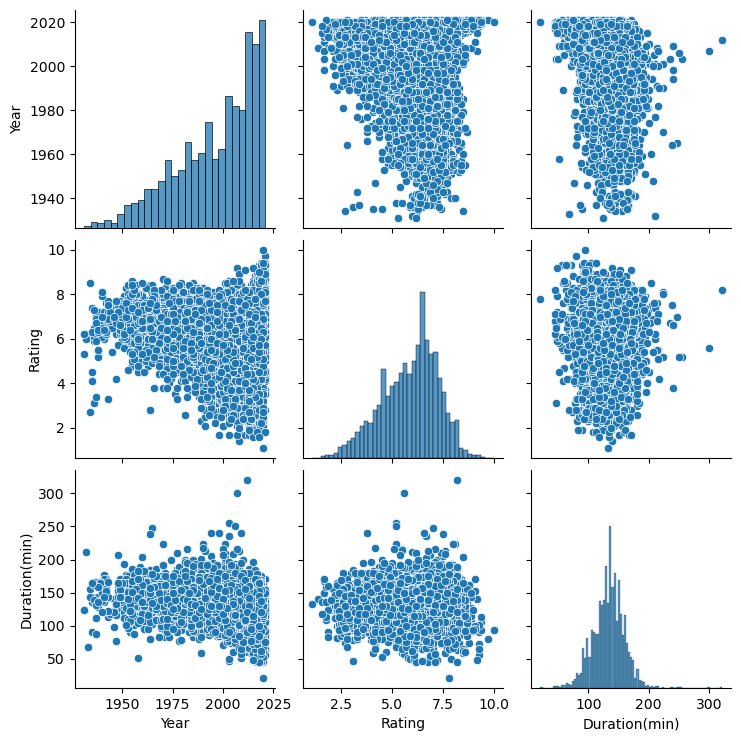

In [96]:

sns.pairplot(df)

In [97]:
top_10=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top_10

TOP_10 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,Drama,10.0
5410,Half Songs,Music,9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,History,9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,Documentary,9.3
8344,Love Sorries,Comedy,9.3
12673,Secrets of Sinauli,Documentary,9.3
11843,Refl3ct,Sci-Fi,9.3


In [98]:
top_10=df[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP_10 based on votes")
top_10

TOP_10 based on votes


,Name,Genre,Votes
12569,Satyam Shivam Sundaram: Love Sublime,Drama,999
5663,Hera Pheri,Action,998
7930,Kurukshetra,Action,996
14286,The Waiting Room,Crime,99
9055,Mazdoor,Drama,99
6634,Jeena Isi Ka Naam Hai,Drama,99
10217,Nirvana13,Drama,99
500,Aatank,Action,99
8256,Login,Drama,99
3961,Dishkiyaoon,Action,986


In [99]:
#Director success rate
director_avg_rating = df.groupby('Director')['Rating'].mean().to_dict()
df['Director_Success'] = df['Director'].map(director_avg_rating)

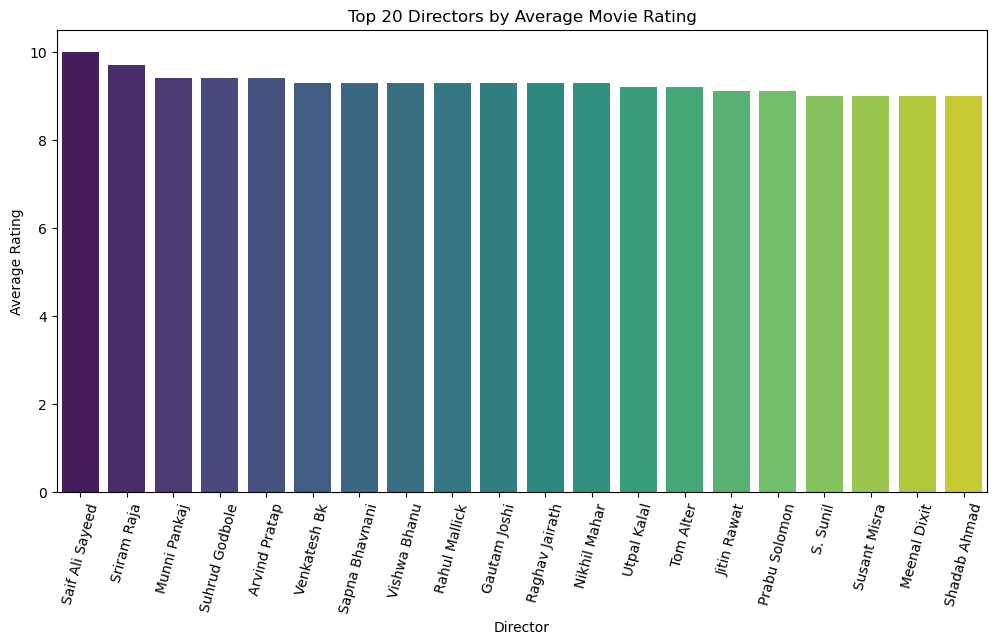

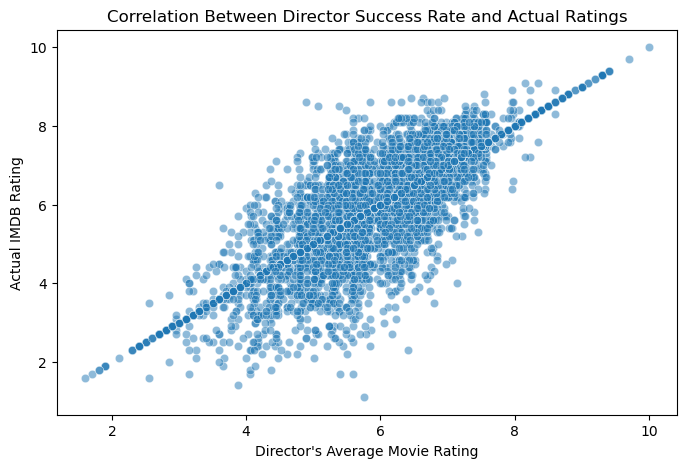

In [109]:
# Top 20 Directors by Average Rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Top 20 Directors by Average Movie Rating")
plt.xlabel("Director")
plt.ylabel("Average Rating")
plt.show()

# Scatter plot to show correlation between Director Success Rate and Actual Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Director_Success'], y=df['Rating'], alpha=0.5)
plt.title("Correlation Between Director Success Rate and Actual Ratings")
plt.xlabel("Director's Average Movie Rating")
plt.ylabel("Actual IMDB Rating")
plt.show()


In [111]:
# Encode categorical variables

In [113]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)

In [115]:
# Feature Engineering: Average Rating of Similar Movies
similar_avg_rating = df.groupby(['Genre encoded', 'Actor 1 encoded'])['Rating'].transform('mean')
df['Similar_Movies_Rating'] = similar_avg_rating

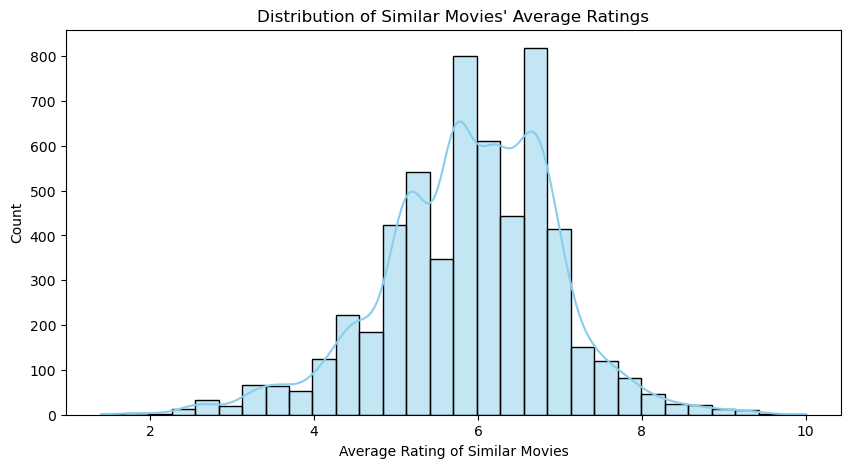

In [117]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Similar_Movies_Rating'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Similar Movies' Average Ratings")
plt.xlabel("Average Rating of Similar Movies")
plt.ylabel("Count")
plt.show()

In [119]:
df.drop("Name",axis=1,inplace=True)

C:\Users\Arshia\AppData\Local\Temp\ipykernel_28252\3687824113.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

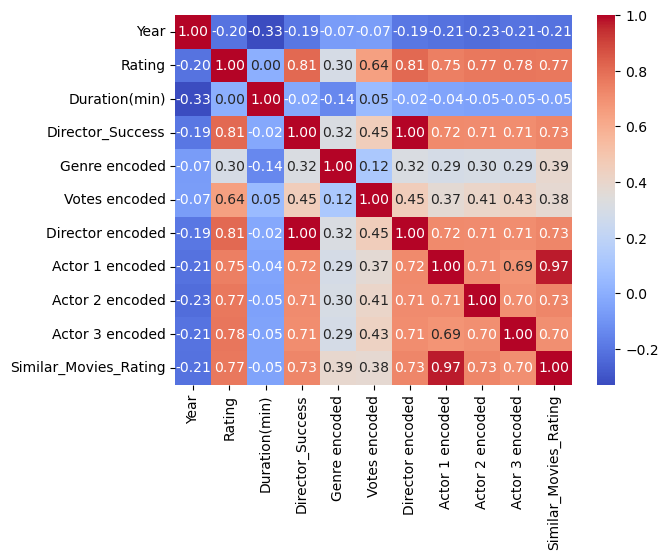

In [121]:
sns.heatmap(df.corr(),cmap="coolwarm",fmt=".2f",annot=True)

In [122]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   5659 non-null   int32  
 1   Duration               5659 non-null   object 
 2   Rating                 5659 non-null   float64
 3   Duration(min)          5659 non-null   float64
 4   Director_Success       5659 non-null   float64
 5   Genre encoded          5659 non-null   float64
 6   Votes encoded          5659 non-null   float64
 7   Director encoded       5659 non-null   float64
 8   Actor 1 encoded        5659 non-null   float64
 9   Actor 2 encoded        5659 non-null   float64
 10  Actor 3 encoded        5659 non-null   float64
 11  Similar_Movies_Rating  5659 non-null   float64
dtypes: float64(10), int32(1), object(1)
memory usage: 552.6+ KB
None


In [125]:
df['Duration(min)'] = df['Duration'].str.replace(' min', '', regex=True).astype(float)


In [127]:
df.drop(columns=['Duration'], inplace=True)

In [145]:
#Choosing best model

In [131]:
x=df.drop("Rating",axis=1)
y=df["Rating"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=None)

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression().fit(x_train,y_train)
y_pred1=model.predict(x_test)

In [135]:
mse=mean_squared_error(y_pred1,y_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred1)

print("MSE FOR LR")
print(mse)


print("R2_SCORE FOR LR")
print(r2_score)

MSE FOR LR
0.28962563385814155
R2_SCORE FOR LR
0.8499706184449438


In [137]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred2=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred2)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred2)

print("MSE FOR DTR")
print(mse)


print("R2_SCORE FOR DTR")
print(r2_score)

MSE FOR DTR
0.5251236749116608
R2_SCORE FOR DTR
0.7279799472946404


In [139]:
from sklearn.ensemble import AdaBoostRegressor

model=AdaBoostRegressor().fit(x_train,y_train)
y_pred3=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred3)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred3)

print("MSE FOR ABR")
print(mse)


print("R2_SCORE FOR ABR")
print(r2_score)

MSE FOR ABR
0.39761623075240804
R2_SCORE FOR ABR
0.7940302576074643


In [140]:
# Visualization: Predicted vs Actual

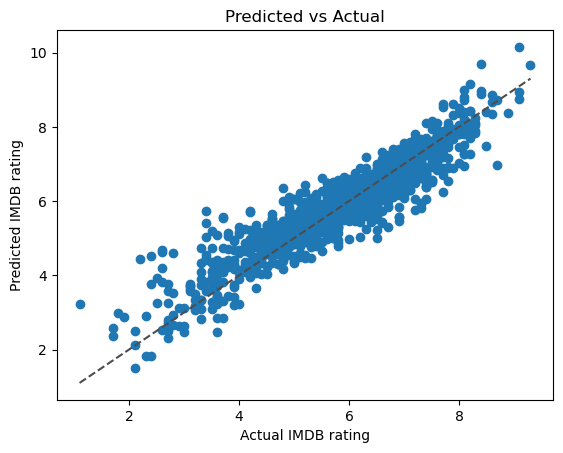

In [141]:
plt.scatter(y_test, y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='.3')
plt.title('Predicted vs Actual')
plt.xlabel('Actual IMDB rating')
plt.ylabel('Predicted IMDB rating')
plt.show()
